Steps Performed in Terminal:
1. pip install modal
2. modal setup

In [1]:
import sys
!{sys.executable} -m pip install modal
import modal
print(f"Modal version: {modal.__version__}")

Defaulting to user installation because normal site-packages is not writeable
Modal version: 1.1.4


In [2]:
import sys
!{sys.executable} -m modal setup

⠋ Waiting for authentication in the web browser
The web browser should have opened for you to authenticate and get an API 
token.
If it didn't, please copy this URL into your web browser manually:

⠋ Waiting for authentication in the web browser
https://modal.com/token-flow/tf-tX2cIwsZ7dWEPDRzo2wUWd

⠋ Waiting for authentication in the web browser
⠋ Waiting for authentication in the web browser

⠋ Waiting for token flow to complete...
⠙ Waiting for token flow to complete...
⠹ Waiting for token flow to complete...
⠸ Waiting for token flow to complete...
⠼ Waiting for token flow to complete...
⠴ Waiting for token flow to complete...
⠧ Waiting for token flow to complete...
⠇ Waiting for token flow to complete...
⠏ Waiting for token flow to complete...
⠋ Waiting for token flow to complete...
⠙ Waiting for token flow to complete...
⠹ Waiting for token flow to complete...
⠼ Waiting for token flow to complete...
⠴ Waiting for token flow to complete...
⠦ Waiting for token flow to complete...
⠧

In [3]:
import sys
!{sys.executable} -m modal config show

{
    'build_validation': 'error',
    'cuda_checkpoint_path': '/__modal/.bin/cuda-checkpoint',
    'default_cloud': None,
    'environment': None,
    'force_build': False,
    'function_runtime': None,
    'function_runtime_debug': False,
    'heartbeat_interval': 15,
    'ignore_cache': False,
    'image_builder_version': None,
    'image_id': None,
    'log_format': 'STRING',
    'log_pattern': None,
    'loglevel': 'WARNING',
    'logs_timeout': 10,
    'restore_state_path': '/__modal/restore-state.json',
    'runtime_perf_record': False,
    'serve_timeout': None,
    'server_url': 'https://api.modal.com',
    'snapshot_debug': False,
    'strict_parameters': False,
    'sync_entrypoint': None,
    'task_id': None,
    'token_id': 'ak-7xoQP3f4YptkGNGnos5Dr8',
    'token_secret': '***',
    'traceback': False,
    'worker_id': None
}


In [4]:
import sys
!{sys.executable} -m modal profile list

┌───┬───────────────────┬───────────────────┐
│   │ Profile           │ Workspace         │
├───┼───────────────────┼───────────────────┤
│ • │ dhanashreernerkar │ dhanashreernerkar │
└───┴───────────────────┴───────────────────┘


In [5]:
# Run a test to make sure Modal functions work
test_code = """
import modal

app = modal.App("test-function")

@app.function()
def hello():
    return "Modal is working correctly!"

@app.local_entrypoint()
def main():
    result = hello.remote()
    print(f"{result}")

if __name__ == "__main__":
    main()
"""

with open("modal_test.py", "w") as f:
    f.write(test_code)

!{sys.executable} -m modal run modal_test.py

- Initializing...
✓ Initialized. View run at 
https://modal.com/apps/dhanashreernerkar/main/ap-AGi2y5Cr7ZLyIAeslmoMxr
- Initializing...
- Initializing...

- Creating objects...
| Creating objects...
└── - Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\modal_test.py: Uploaded 
    0/1 files
/ Creating objects...
└── | Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\modal_test.py: Uploaded 
    0/1 files
| Creating objects...
└── / Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\modal_test.py: Uploaded 
    0/1 files
- Creating objects...
└── | Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\modal_test.py: 
    Finalizing index of 1 files
| Creating objects...
├── 🔨 Created mount 
│   c:\class\Self_Learning_AI\week_02\Week2-Assignment\modal_test.py
└── - Creating function hello...
| Creating objects...
├── 🔨 Created mount 
│   c:\class\Self_Learning_AI\week_02\Week2-Assignment\modal_test.py
└── 🔨

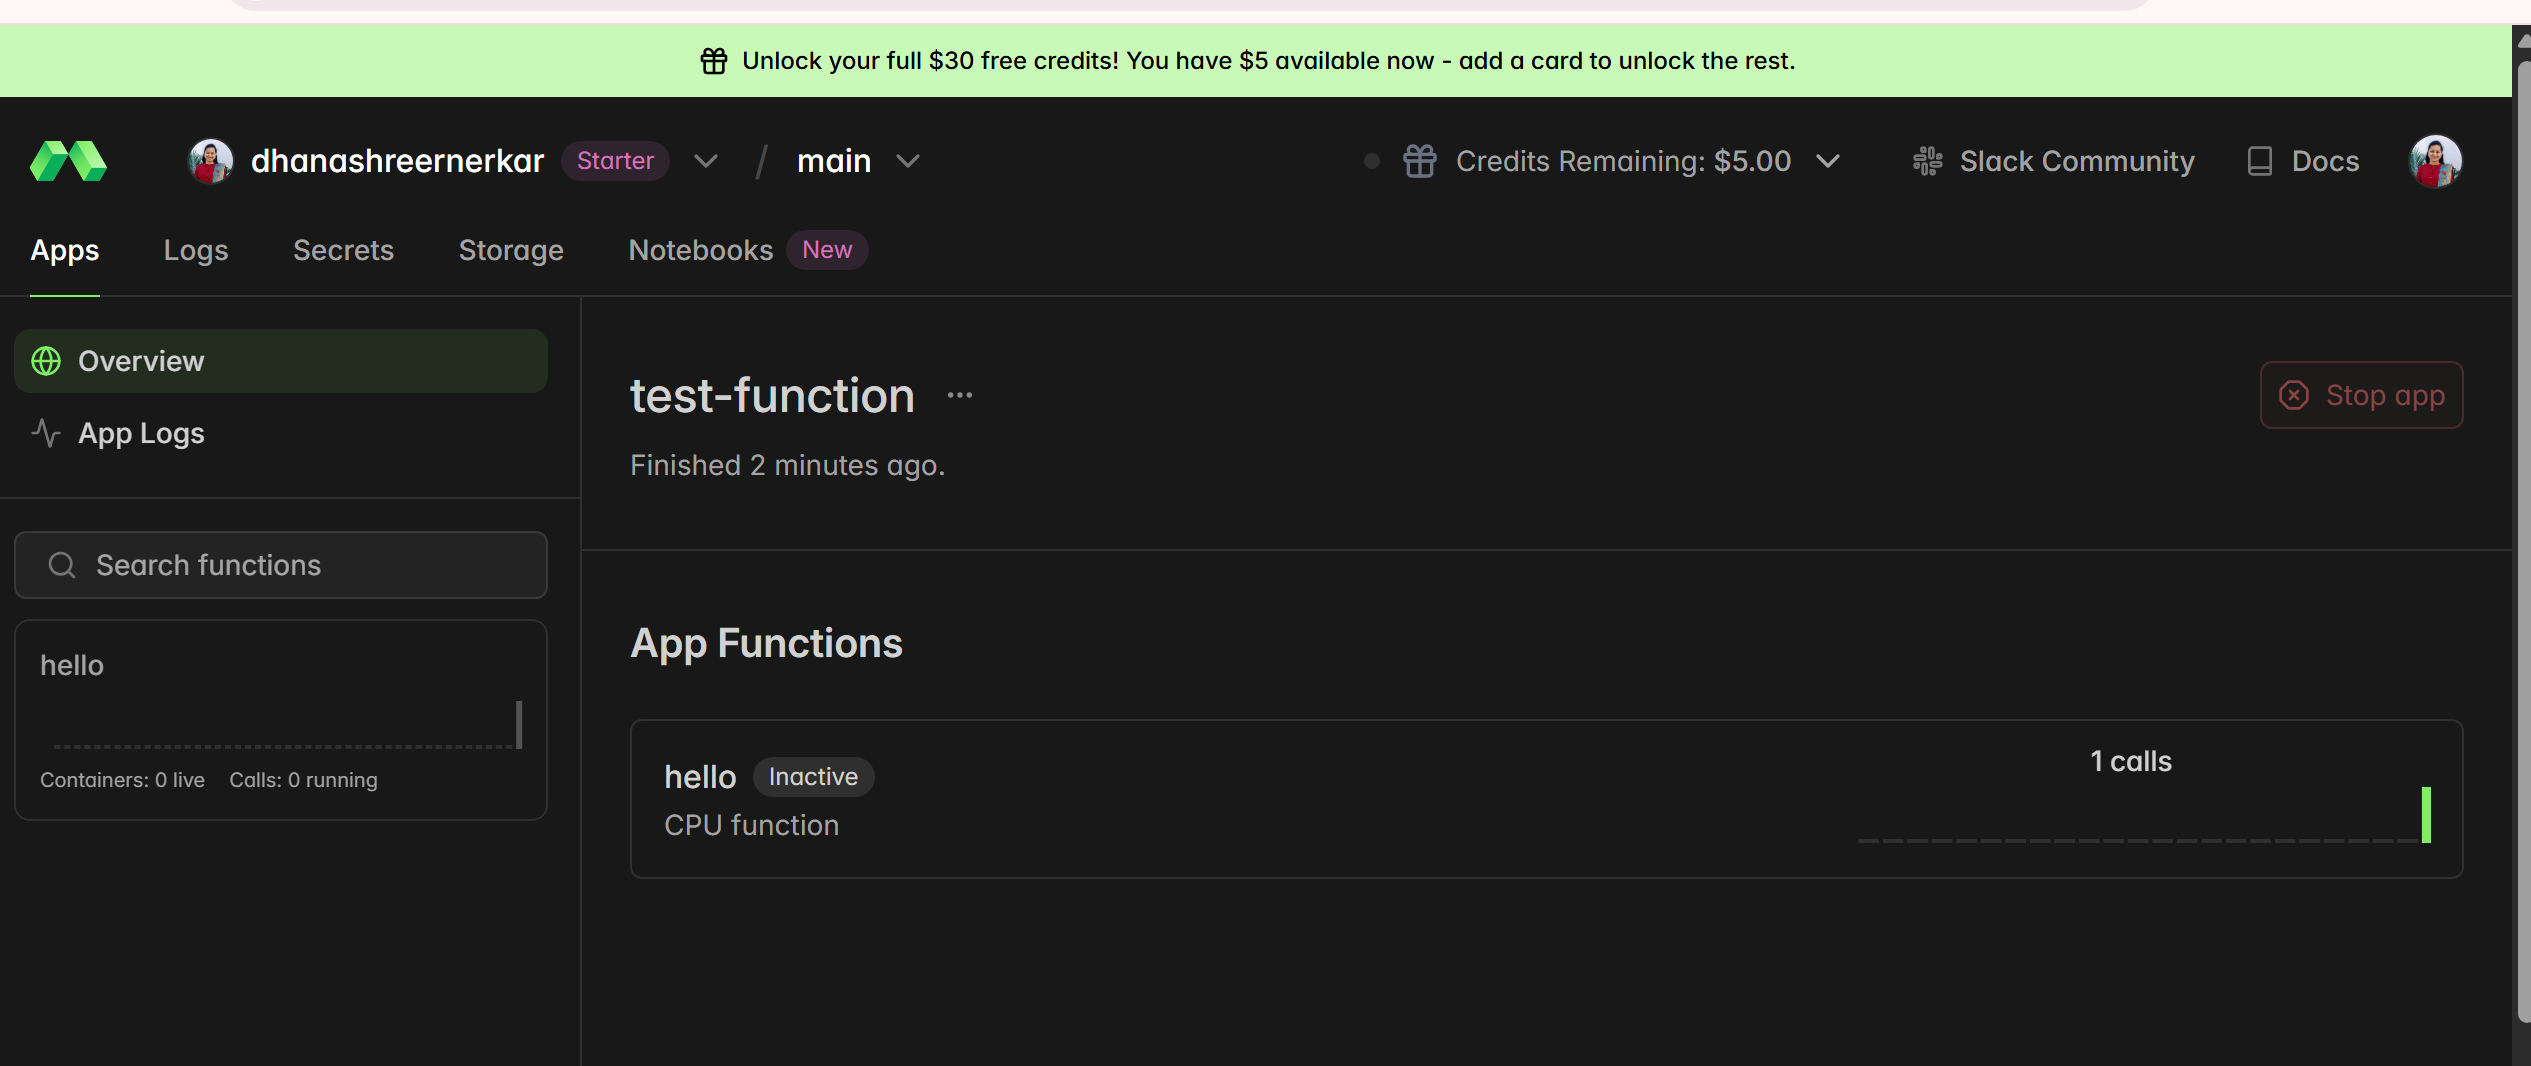

In [6]:
gpu_test = """
import modal

app = modal.App("gpu-capability-test")

@app.function(gpu="T4")
def test_gpu():
    import subprocess
    result = subprocess.run(['nvidia-smi'], capture_output=True, text=True)
    return result.stdout

@app.local_entrypoint()
def main():
    print("Testing GPU access...")
    output = test_gpu.remote()
    print(output)

if __name__ == "__main__":
    main()
"""

with open("gpu_test.py", "w") as f:
    f.write(gpu_test)

!{sys.executable} -m modal run gpu_test.py

- Initializing...
✓ Initialized. View run at 
https://modal.com/apps/dhanashreernerkar/main/ap-33Qrhx46c8xFUUMXXVgp4k
- Initializing...
- Initializing...

- Creating objects...
\ Creating objects...
└── - Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\gpu_test.py: Uploaded 
    0/1 files
/ Creating objects...
└── | Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\gpu_test.py: Uploaded 
    0/1 files
| Creating objects...
└── - Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\gpu_test.py: Uploaded 
    0/1 files
- Creating objects...
└── | Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\gpu_test.py: Finalizing 
    index of 1 files
\ Creating objects...
├── 🔨 Created mount 
│   c:\class\Self_Learning_AI\week_02\Week2-Assignment\gpu_test.py
└── 🔨 Created function test_gpu.

✓ Created objects.
├── 🔨 Created mount 
│   c:\class\Self_Learning_AI\week_02\Week2-Assignment\gpu_test.py
└── 🔨 Created funct

Download a Model to Modal Volume

In [7]:
download_model_script = """
import modal
from pathlib import Path

# Create/connect to a volume for storing models
volume = modal.Volume.from_name("model-weights", create_if_missing=True)
app = modal.App("download-model")

image = modal.Image.debian_slim().pip_install(
    "huggingface_hub",
    "transformers",
    "torch"
)

@app.function(
    image=image,
    volumes={"/models": volume},
    timeout=1800,
)
def download_model(model_id: str = "gpt2"):
    from huggingface_hub import snapshot_download
    
    model_path = Path(f"/models/{model_id}")
    print(f"Downloading {model_id} to {model_path}...")
    
    snapshot_download(
        repo_id=model_id,
        local_dir=str(model_path),
        local_dir_use_symlinks=False
    )
    
    # List downloaded files
    print(f"\\nDownloaded files for {model_id}:")
    for file in model_path.rglob("*"):
        if file.is_file():
            print(f"  - {file.name}")
    
    volume.commit()
    return f"Model {model_id} downloaded successfully"

@app.local_entrypoint()
def main():
    result = download_model.remote("gpt2")  # Using small GPT-2 model
    print(result)

if __name__ == "__main__":
    main()
"""

with open("download_model.py", "w") as f:
    f.write(download_model_script)

!{sys.executable} -m modal run download_model.py

- Initializing...
✓ Initialized. View run at 
https://modal.com/apps/dhanashreernerkar/main/ap-5GvLOWSEGPmM2Y55b7Arx9
- Initializing...
- Initializing...

- Creating objects...
\ Creating objects...
└── - Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\download_model.py: 
    Uploaded 0/1 files
Building image im-Bn7xNOv4nSiAipn0qsm1z5
/ Creating objects...
└── \ Creating mount c:\class\Self_Learning_AI\week_02\Week2-Assignment\downloa
/ Creating objects...
└── | Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\download_model.py: 
    Uploaded 0/1 files

=> Step 0: FROM base
- Creating objects...
└── | Creating mount c:\class\Self_Learning_AI\week_02\Week2-Assignment\downloa

=> Step 1: RUN python -m pip install huggingface_hub torch transformers
\ Creating objects...
└── / Creating mount c:\class\Self_Learning_AI\week_02\Week2-Assignment\downloa
| Creating objects...
└── - Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignmen

Setup vLLM Inference Server and Test Inference

In [11]:
simple_inference_script = """
import modal

volume = modal.Volume.from_name("model-weights", create_if_missing=True)
app = modal.App("simple-inference")

image = modal.Image.debian_slim().pip_install(
    "torch",
    "transformers",
    "accelerate"
)

@app.function(
    image=image,
    gpu="T4",
    timeout=300,
    volumes={"/models": volume}
)
def test_inference():
    from transformers import GPT2LMHeadModel, GPT2Tokenizer
    import torch
    
    print("Loading GPT-2 from downloaded model...")
    model_path = "/models/gpt2"
    
    tokenizer = GPT2Tokenizer.from_pretrained(model_path)
    model = GPT2LMHeadModel.from_pretrained(model_path)
    
    if torch.cuda.is_available():
        model = model.cuda()
        print("Using GPU for inference")
    
    test_prompts = [
        "The future of artificial intelligence is",
        "Once upon a time",
        "The key to happiness is"
    ]
    
    print("=" * 50)
    print("TESTING INFERENCE ON HUGGINGFACE MODEL (GPT-2)")
    print("=" * 50)
    
    for prompt in test_prompts:
        print("")  # Empty line before each prompt
        print(f"Prompt: {prompt}")
        inputs = tokenizer.encode(prompt, return_tensors="pt")
        if torch.cuda.is_available():
            inputs = inputs.cuda()
        
        with torch.no_grad():
            outputs = model.generate(inputs, max_length=50, temperature=0.7, do_sample=True)
        
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print(f"Response: {response}")
        print("-" * 40)
    
    return "Inference test complete!"

@app.local_entrypoint()
def main():
    result = test_inference.remote()
    print(result)
    print("App will auto-shutdown after completion")

if __name__ == "__main__":
    main()
"""

with open("simple_inference.py", "w", encoding="utf-8") as f:
    f.write(simple_inference_script)

!{sys.executable} -m modal run simple_inference.py

- Initializing...
✓ Initialized. View run at 
https://modal.com/apps/dhanashreernerkar/main/ap-yGUZs2x7kULCN4s78JGUz1
- Initializing...
- Initializing...

- Creating objects...
| Creating objects...
└── - Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\simple_inference.py: 
    Uploaded 0/1 files
- Creating objects...
└── | Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment\simple_inference.py: 
    Uploaded 0/1 files
Building image im-s2g57JeEXYdIj30sG9dl5K
- Creating objects...
└── | Creating mount c:\class\Self_Learning_AI\week_02\Week2-Assignment\simple_

=> Step 0: FROM base
\ Creating objects...
└── / Creating mount c:\class\Self_Learning_AI\week_02\Week2-Assignment\simple_

=> Step 1: RUN python -m pip install accelerate torch transformers
| Creating objects...
└── - Creating mount c:\class\Self_Learning_AI\week_02\Week2-Assignment\simple_
| Creating objects...
└── - Creating mount 
    c:\class\Self_Learning_AI\week_02\Week2-Assignment